<a href="https://colab.research.google.com/github/Amolrakhunde/Yes-Bank-Stock-Prediction/blob/main/Yes_Bank_Stock_Prediction_Amol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**YES BANK STOCK PREDICTION**

##Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

#**Initializing & Importing Required Libraries**

In [3]:
#Importing libraries for data handelling
import pandas as pd
import numpy as np
from numpy import math

#Importing libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

#Mounting Drive & Loading Dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/CapStone Projects/ML Yes Bank Stock Prediction/data_YesBank_StockPrices.csv')

In [5]:
#first look of dataset
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


**Data Description:**

Dataset contains Yes Bank stock monthly prices since it inception. Following are its features:-

* **Date:** In our data its monthly observation of stock since its inception.
* **Open:** The price a stock when the stock exchange open for the day.
* **High:** The maximum price of a stock attain during given period of time.
* **Low:** The minimum price of a stock attain during given period of time.
* **Close:** The price of a stock when the stock exchange closed for the day.







#**Data Preprocessing**

In [6]:
#Take a look at data
#first 5 rows
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [8]:
#last 5 rows
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


--Data available from Jul 2005 to Nov 2020.

In [9]:
#shape of data
df.shape

(185, 5)

In [10]:
#Details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


-- Will need to change data type of date to datetime.

In [11]:
#Summarry of dataset
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


**Missing Values:-**

In [12]:
#Looking for missing values
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

-- No missing values in dataset.

**Duplicate Rows:-**

In [15]:
#Looking for duplicates in dataset
len(df[df.duplicated()])

0

-- Do not have any duplicates in dataset.

**Data Type Change:-**

Feature date in dataset is in object type, we need to change it to datetime format.

In [16]:
#importing datetime
from datetime import datetime
#parsing date which is string of format %b-%y to datetime (%b is for Jul i.e month short form and %y is for year in two digit)
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [17]:
#lets look dataset after date format change
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [18]:
#check dtype of date now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


-- Yes!! Format and data type of date feature chnaged into datetime.

**Data preprocessing finished.**
Dataset is clean and ready for exploratory data analysis.

#**Exploratory Data Analysis**

**Visualize closing price of Yes Bank stock.**

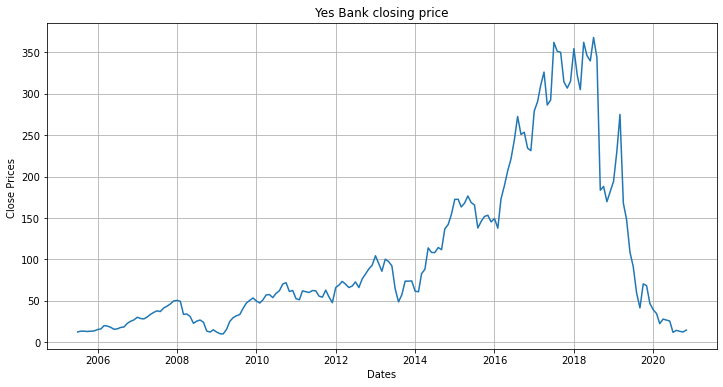

In [23]:
#plotting close price vs date
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices ')
plt.plot(df['Date'], df['Close'])
plt.title('Yes Bank closing price')
plt.show()

--Yes Bank closing stock prices severely went down after 2018. This must be because of the fraud case invloving Rana Kapoor.

**Lets visualize close, open, low and high in combined line plot.**

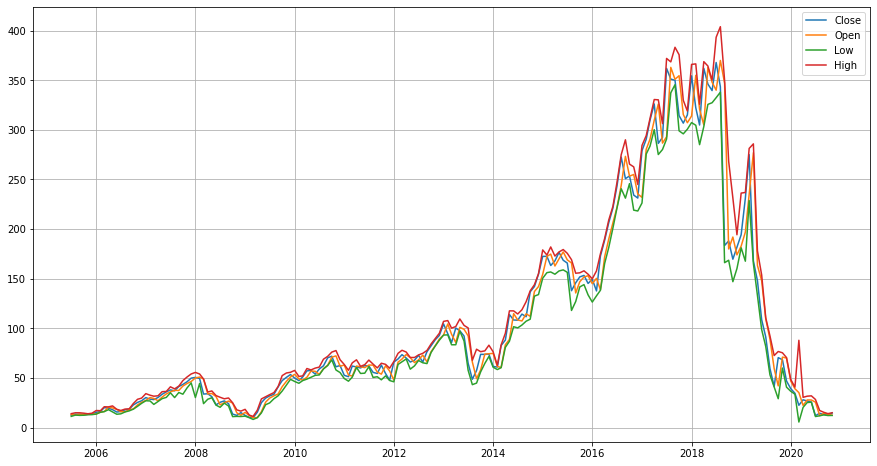

In [25]:
# Combined Line Plot for all features with respect to date.
plt.figure(figsize=(15,8))
plt.plot(df['Date'], df['Close'])
plt.plot(df['Date'], df['Open'])
plt.plot(df['Date'], df['Low'])
plt.plot(df['Date'], df['High'])
plt.legend(['Close','Open','Low','High'])
plt.grid()

--All the prices shows almost similar trends with each other. 

-- Which means that this features may be strongly correlated with each other.